<a href="https://colab.research.google.com/github/rameshch16/DATA-SCIENCE/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k

In [0]:
batch_size=128
n_classes=10
n_epoch=10

#input image shape
n_rows,n_cols=28,28

#read and split the mnist data as train and test
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [50]:
print(x_train.shape)
print(x_train.astype)

print(y_train.shape)
print(y_train.astype)

print(x_test.shape)
print(x_test.astype)

print(y_test.shape)
print(y_test.astype)

# first image with 28*28 
#print(x_train[0])

(60000, 28, 28)
<built-in method astype of numpy.ndarray object at 0x7fab3d9e7b20>
(60000,)
<built-in method astype of numpy.ndarray object at 0x7fab3d9e7d00>
(10000, 28, 28)
<built-in method astype of numpy.ndarray object at 0x7fab3d9e7d50>
(10000,)
<built-in method astype of numpy.ndarray object at 0x7fab3d9e7da0>


In [51]:
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

60000
28
28


In [52]:

print(k.image_data_format())
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1,n_rows,n_cols)
  x_test  = x_test.reshape(x_test.shape[0],1,n_rows,n_cols)
  input_img_shape = (1,n_rows,n_cols)
else:
  x_train = x_train.reshape(x_train.shape[0],n_rows,n_cols,1)
  x_test  = x_test.reshape(x_test.shape[0],n_rows,n_cols,1)
  input_img_shape = (n_rows,n_cols,1)

#convert type and then normalize input 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255;
x_test /= 255;






channels_last


In [53]:
print("traing data shape",x_train.shape)
print("traing data size",len(x_train))
print("test data size",len(x_test))
#size will give mulitiplication aof all dimensions not length
#print("traing data size",x_test.size)

traing data shape (60000, 28, 28, 1)
traing data size 60000
test data size 10000


In [0]:
# first image after normalization
#print(x_train[0])

In [0]:
#convert labels as categorical
y_train = keras.utils.to_categorical(y_train,n_classes)
y_test = keras.utils.to_categorical(y_test,n_classes)

In [30]:
#convert labels as 1d array of size 10 (example for 2 [0,0,1,0,0,0,0,0,0,0,0])
print(y_train.shape)

(60000, 10)


In [56]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_img_shape))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.adadelta(),metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=128,epochs=2,verbose=1,validation_data=(x_test,y_test))

score= model.evaluate(x_test,y_test,verbose=0)

print("test loss",score[0])
print("test accuracy",score[1])



Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 165s 3ms/step - loss: 0.2498 - acc: 0.9223 - val_loss: 0.0540 - val_acc: 0.9824
Epoch 2/2
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0845 - acc: 0.9755 - val_loss: 0.0436 - val_acc: 0.9848
test loss 0.04357295704029966
test accuracy 0.9848


In [57]:
img = x_test[130]
#test_img = img.reshape((1,784))
img_class = model.predict_classes(img.reshape((1,28, 28,1)))
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  6


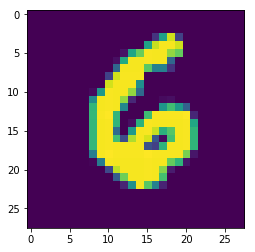

In [58]:
import matplotlib.pyplot as plt
two_d = (np.reshape(x_test[130], (28, 28)) * 255).astype(np.uint8)
plt.imshow(two_d, interpolation='nearest')